In [24]:
import numpy as np
import pandas as pd

In [25]:
# Read the data from the csv file
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
white_wine_data = pd.read_csv('winequality-white.csv', sep=';')

# Add a column to the data to indicate the type of wine
red_wine_data['type'] = 0
white_wine_data['type'] = 1

# Combine the two datasets into one
wine_data = pd.concat([red_wine_data, white_wine_data])
# print(wine_data)

<Axes: xlabel='quality', ylabel='Count'>

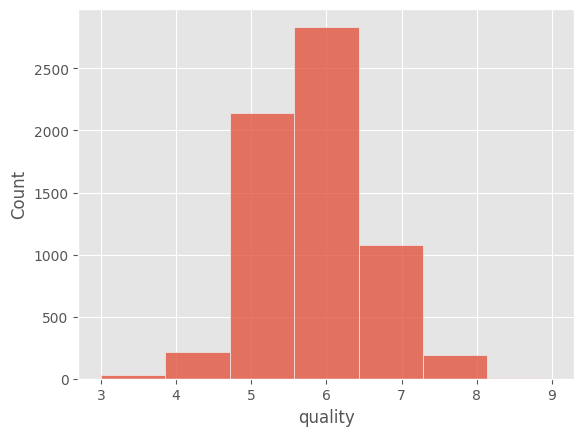

In [26]:
# Plot the data in a histogram seaborn
import seaborn as sn
from matplotlib import style
style.use('ggplot')
sn.histplot(wine_data['quality'], bins=7)



In [27]:
"""
Function to remove correlated features using sklearn
Unnecessary, all features are useful
"""


# def remove_correlated_features(data: pd.DataFrame, nf=5, p=False):
#     from sklearn.feature_selection import SelectKBest
#     from sklearn.feature_selection import chi2
    
#     X = data.drop('quality', axis=1)
#     y = data['quality']

#     # extract top nf best features
#     bestfeatures = SelectKBest(score_func=chi2, k=nf)
#     fit = bestfeatures.fit(X,y)
#     dfscores = pd.DataFrame(fit.scores_)
#     dfcolumns = pd.DataFrame(X.columns)
#     # concat two dataframes for better visualization 
#     featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#     featureScores.columns = ['Specs','Score']  # naming the dataframe columns
#     if p:
#         print(featureScores.nlargest(nf,'Score'))  # print nf best features
#     junk = featureScores.nsmallest(len(featureScores)-nf,'Score')['Specs']
#     # remove the correlated features
#     return data.drop(junk, axis=1)

'\nFunction to remove correlated features using sklearn\nUnnecessary, all features are useful\n'

In [28]:
"""
Implementation of Ordinal Regression using the Threshold Model

Abandoned in favour of the mord package, as the question says we can indeed use packages for ordinal and 
linear regression
"""



# def sigmoid(t):
#     # sigmoid function, 1 / (1 + exp(-t))
#     # stable computation
#     idx = t > 0
#     out = np.zeros_like(t)
#     out[idx] = 1. / (1 + np.exp(-t[idx]))
#     exp_t = np.exp(t[~idx])
#     out[~idx] = exp_t / (1. + exp_t)
#     return out


# def log_loss(Z):
#     # stable computation of the logistic loss
#     idx = Z > 0
#     out = np.zeros_like(Z)
#     out[idx] = np.log(1 + np.exp(-Z[idx]))
#     out[~idx] = (-Z[~idx] + np.log(1 + np.exp(Z[~idx])))
#     return out


# def obj_margin(x0, X, y, alpha, n_class, weights, L, sample_weight):
#     w = x0[:X.shape[1]]
#     c = x0[X.shape[1]:]
#     theta = L.dot(c)
#     loss_fd = weights[y]
#     Xw = X.dot(w)
#     Alpha = theta[:, None] - Xw  # (n_class - 1, n_samples)
#     S = np.sign(np.arange(n_class - 1)[:, None] - y + 0.5)
#     err = loss_fd.T * log_loss(S * Alpha)
#     if sample_weight is not None:
#         err *= sample_weight
#     obj = np.sum(err)
#     obj += alpha * 0.5 * (np.dot(w, w))
#     return obj


# def grad_margin(x0, X, y, alpha, n_class, weights, L, sample_weight):
#     w = x0[:X.shape[1]]
#     c = x0[X.shape[1]:]
#     theta = L.dot(c)
#     loss_fd = weights[y]
#     Xw = X.dot(w)
#     Alpha = theta[:, None] - Xw  # (n_class - 1, n_samples)
#     S = np.sign(np.arange(n_class - 1)[:, None] - y + 0.5)
#     Sigma = S * loss_fd.T * sigmoid(-S * Alpha)
#     if sample_weight is not None:
#         Sigma *= sample_weight
#     grad_w = X.T.dot(Sigma.sum(0)) + alpha * w
#     grad_theta = -Sigma.sum(1)
#     grad_c = L.T.dot(grad_theta)
#     return np.concatenate((grad_w, grad_c), axis=0)


# def threshold_fit(X, y, alpha, n_class, mode='AE',
#                   max_iter=1000, verbose=False, tol=1e-12,
#                   sample_weight=None):
#     from sklearn.utils.validation import check_X_y
#     X, y = check_X_y(X, y, accept_sparse='csr')
#     unique_y = np.sort(np.unique(y))
#     if not np.all(unique_y == np.arange(unique_y.size)):
#         raise ValueError(
#             'Values in y must be %s, instead got %s'
#             % (np.arange(unique_y.size), unique_y))
#     n_samples, n_features = X.shape
#     # convert from c to theta
#     L = np.zeros((n_class - 1, n_class - 1))
#     L[np.tril_indices(n_class-1)] = 1.
#     if mode == 'AE':
#         # loss forward difference
#         loss_fd = np.ones((n_class, n_class - 1))
#     elif mode == '0-1':
#         loss_fd = np.diag(np.ones(n_class - 1)) + \
#             np.diag(np.ones(n_class - 2), k=-1)
#         loss_fd = np.vstack((loss_fd, np.zeros(n_class - 1)))
#         loss_fd[-1, -1] = 1  # border case
#     elif mode == 'SE':
#         a = np.arange(n_class-1)
#         b = np.arange(n_class)
#         loss_fd = np.abs((a - b[:, None])**2 - (a - b[:, None]+1)**2)
#     else:
#         raise NotImplementedError
#     x0 = np.zeros(n_features + n_class - 1)
#     x0[X.shape[1]:] = np.arange(n_class - 1)
#     options = {'maxiter' : max_iter, 'disp': verbose}
#     if n_class > 2:
#         bounds = [(None, None)] * (n_features + 1) + \
#                  [(0, None)] * (n_class - 2)
#     else:
#         bounds = None
#     sol = optimize.minimize(obj_margin, x0, method='L-BFGS-B',
#         jac=grad_margin, bounds=bounds, options=options,
#         args=(X, y, alpha, n_class, loss_fd, L, sample_weight),
#         tol=tol)
#     if verbose and not sol.success:
#         print(sol.message)
#     w, c = sol.x[:X.shape[1]], sol.x[X.shape[1]:]
#     theta = L.dot(c)
#     return w, theta


# # This is based off of mord.LogisticAT. A few unused methods were removed, along with some error-checking.
# class CustomOrdinal:
#     def __init__(self, alpha=1., max_iter=1000) -> None:
#         self.alpha = alpha
#         self.max_iter = max_iter

#     def fit(self, X, y):
#         # The below two variables were fields of the class in mord. This is not necessary here.
#         classes = np.unique(y)
#         n_class = classes.max() - classes.min() + 1
#         # Added this field instead. Represents the offset of the classes.
#         self.shift = classes.min()
#         y_shift = y - y.min()
#         self.coef, self.theta = threshold_fit(
#             X, 
#             y_shift, 
#             self.alpha, 
#             n_class, 
#             max_iter=self.max_iter,
#         )
#         return self
    
#     def predict(self, X):
#         return np.sum(
#             self.theta[:, None] - np.asarray(X.dot(self.coef)) < 0, 
#             axis=0
#         ).astype(int) + self.shift
    

'\nImplementation of Ordinal Regression using the Threshold Model\n\nAbandoned in favour of package, as the question says we can indeed use packages for ordinal and \nlinear regression\n'

In [29]:

# function for ordinal regression of the quality column from selected features using the mord package 
# Low accuracy, about the same as logistic regression from sklearn
# Eh. Not great.
# Turns out 'not great' is good enough, lol.
def ordinal_regression_custom(data: pd.DataFrame, nf=5):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report
    from sklearn.preprocessing import StandardScaler
    from mord import LogisticAT

    # split the data into training and testing sets
    X = data.drop(['quality'], axis=1) # everything except the quality column
    # print(X)
    y = data['quality'] # the quality column
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    # scale the data - this speeds up the computation.
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    scaler.fit(X_test)
    X_test = scaler.transform(X_test)


    # fit the model using mord multiclass classifier
    model = LogisticAT()
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)

    # print('Accuracy')
    out = pd.DataFrame(columns=['Accuracy', 'Pseudo-Accuracy'], index=['Ordinal', 'Linear'])

    # evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    out['Accuracy']['Ordinal'] = accuracy * 100.0

    # Sometimes the output may be off by 1. 
    # New metric is okay with off-by-one errors.
    # With ordinal data, if the output is within some small range of the actual value, 
    # it may still be considered correct.
    pseudo_accuracy = np.sum(np.abs(y_test - y_pred) <= 1) / len(y_test)
    out['Pseudo-Accuracy']['Ordinal'] = pseudo_accuracy * 100.0


    # Linear Regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = np.sum(np.rint(y_pred) == y_test) / len(y_test)
    out['Accuracy']['Linear'] = accuracy * 100.0
    pseudo_accuracy = np.sum(np.abs(y_test - np.rint(y_pred)) <= 1) / len(y_test)
    out['Pseudo-Accuracy']['Linear'] = pseudo_accuracy * 100.0



    print(out)


In [30]:
# main
ordinal_regression_custom(wine_data)

# Output:
#           Accuracy Pseudo-Accuracy
# Ordinal    <?????>         <?????>
# Linear     <?????>         <?????>



          Accuracy Pseudo-Accuracy
Ordinal  53.384615       94.769231
Linear   53.230769       94.846154


# Conclusions

## Relative performance of Linear and Ordinal Regression

- Both linear and ordinar regression are yielding highly similar results in accuracy as well as pseudoaccuracy
- This indicates that the dataset could, in fact, be modeled by linear regression, and that the non-linearities are not significant enough to warrant the use of a more complex model

## Metrics

Here, we have used the following metrics:
  - Accuracy: The percentage of correctly classified samples
  - Pseudo-Accuracy: The percentage of samples classified to within one ordinal caregory of the correct output. For example, if the correct output is 3, then Pseudo-Accuracy is the percentage of samples classified as 2, 3 or 4

### Note: 
In linear regression, the output is rounded off to the nearest integer and then compared to the correct output